In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.model_selection import train_test_split
import re
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('laptops.csv')

In [3]:
df.head()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,MSI,Business Laptop,17.040680,IPS Panel Retina Display 2560x1600,Intel Core i7,12GB,512GB SSD,Intel Iris Xe Graphics,Linux,2.064834,35844.099371
1,Chuwi,2 in 1 Convertible,16.542395,Full HD,Intel Core i5,12GB,128GB PCIe SSD,Intel Iris Xe Graphics,No OS,4.060656,37019.059051
2,hp,WorkStation,17.295294,Full HD,Intel Xeon E3-1505M,8GB,1TB HDD,Intel Iris Xe Graphics,Linux,2.901689,33329.360341
3,MSI,2 in 1 Convertible,11.526203,2K,Intel Core i7,16GB,512GB NVMe SSD,Intel Iris Xe Graphics,Windows 10,2.914843,68631.102486
4,Microsoft,Gaming,12.649634,Full HD,Intel Core i5,8GB,512GB SSD,AMD Radeon RX 5600M,Windows 10,4.341995,33842.479566


In [4]:
df.tail()

,CompanyName,TypeOfLaptop,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
995,hp,Gaming,16.242566,HD 1920x1080,AMD A9-Series 9420,8GB,128GB SSD,AMD Radeon RX 5600M,Windows 10,4.685053,40254.533272
996,Microsoft,WorkStation,17.450809,4K,Intel Celeron Dual Core 3855U,8GB,2TB SATA SSD,NVIDIA GeForce GTX 1650,macOS,3.934182,57272.697780
997,lenevo,NoteBook,13.761288,HD 1920x1080,AMD Ryzen 7,16GB,128GB PCIe SSD,NVIDIA GeForce GTX 1650,Windows 10,4.047468,48214.606894
998,Asus,UltraBook,11.038000,IPS Panel Retina Display 2560x1600,Intel Core i9,12GB,1TB Fusion Drive,Intel Iris Xe Graphics,No OS,3.669825,58926.553683
999,Dell,NoteBook,11.005842,Full HD,Intel Celeron Dual Core 3855U,4GB,4TB HDD,Intel Iris Xe Graphics,No OS,4.799675,63873.992922


In [5]:
df.isnull().sum()

CompanyName         0
TypeOfLaptop        0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.describe()


,Inches,Weight,Price
count,1000.000000,1000.000000,1000.000000
mean,14.496646,3.469800,51602.255339
std,2.066624,0.857112,13802.833231
min,11.005842,2.000819,30060.275100
25%,12.677791,2.720228,40376.617670
50%,14.509298,3.477824,50683.971717
75%,16.313026,4.189891,61897.280126
max,17.998786,4.994556,115137.368077


In [7]:
categorical_cols = ['CompanyName', 'TypeOfLaptop', 'ScreenResolution', 'Cpu', 'Gpu', 'OpSys']
for col in categorical_cols:
    print(f"{col} unique values:\n", df[col].value_counts(), "\n")

CompanyName unique values:
 CompanyName
MSI          128
Microsoft    118
Apple        113
lenevo       113
Asus         112
Chuwi        109
Acer         107
Dell         101
hp            99
Name: count, dtype: int64 

TypeOfLaptop unique values:
 TypeOfLaptop
Business Laptop       176
WorkStation           175
Gaming                168
UltraBook             166
2 in 1 Convertible    162
NoteBook              153
Name: count, dtype: int64 

ScreenResolution unique values:
 ScreenResolution
2K                                           181
4K                                           179
IPS Panel Full HD / Touchscreen 1920x1080    176
Full HD                                      162
HD 1920x1080                                 160
IPS Panel Retina Display 2560x1600           142
Name: count, dtype: int64 

Cpu unique values:
 Cpu
Intel Xeon E3-1505M               114
Intel Atom x5-Z8550               111
Intel Core i5                     105
Intel Pentium Quad Core N4200     101
Intel

In [8]:
df.columns

Index(['CompanyName', 'TypeOfLaptop', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

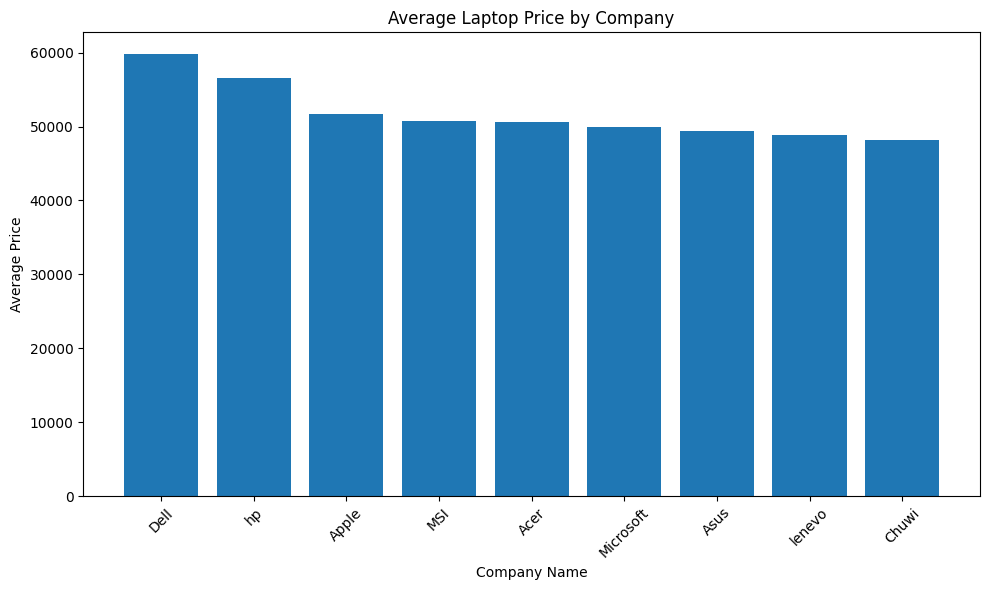

In [9]:
avg_price = df.groupby('CompanyName')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(avg_price.index, avg_price.values)
plt.xticks(rotation=45)
plt.title('Average Laptop Price by Company')
plt.xlabel('Company Name')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()


In [10]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)

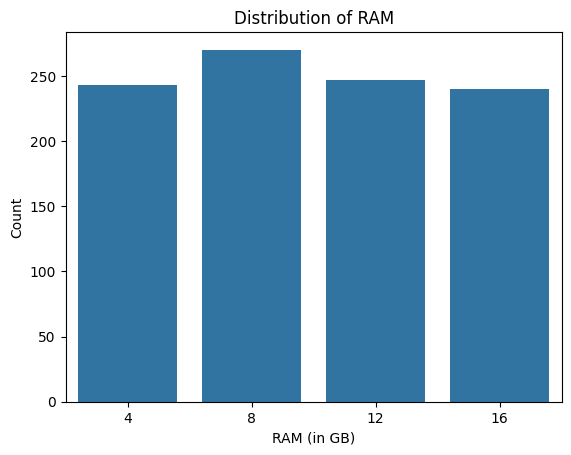

In [11]:
snb.countplot(x='Ram', data=df)
plt.title("Distribution of RAM")
plt.xlabel("RAM (in GB)")
plt.ylabel("Count")
plt.show()

In [12]:
plt.figure(figsize=(8,6))
snb.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')


NameError: name 'y_test' is not defined

<Figure size 800x600 with 0 Axes>

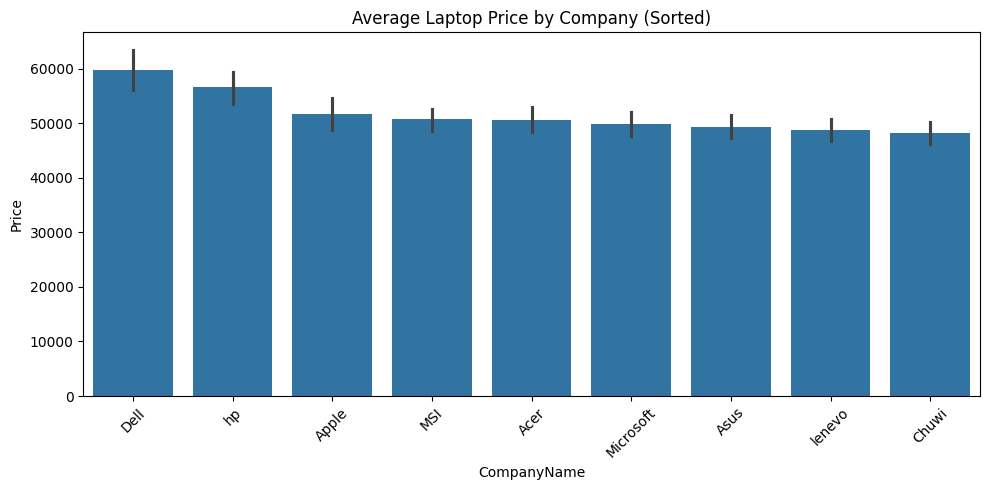

In [ ]:
plt.figure(figsize=(10,5))
avg_price_by_company = df.groupby('CompanyName')['Price'].mean().sort_values(ascending=False).index

snb.barplot(x='CompanyName', y='Price', data=df, order=avg_price_by_company)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by Company (Sorted)")
plt.tight_layout()
plt.show()


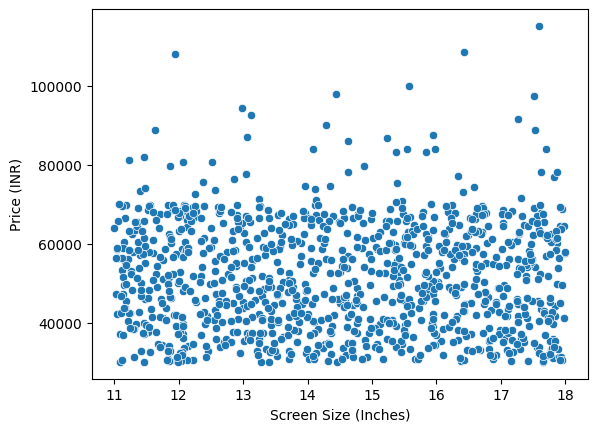

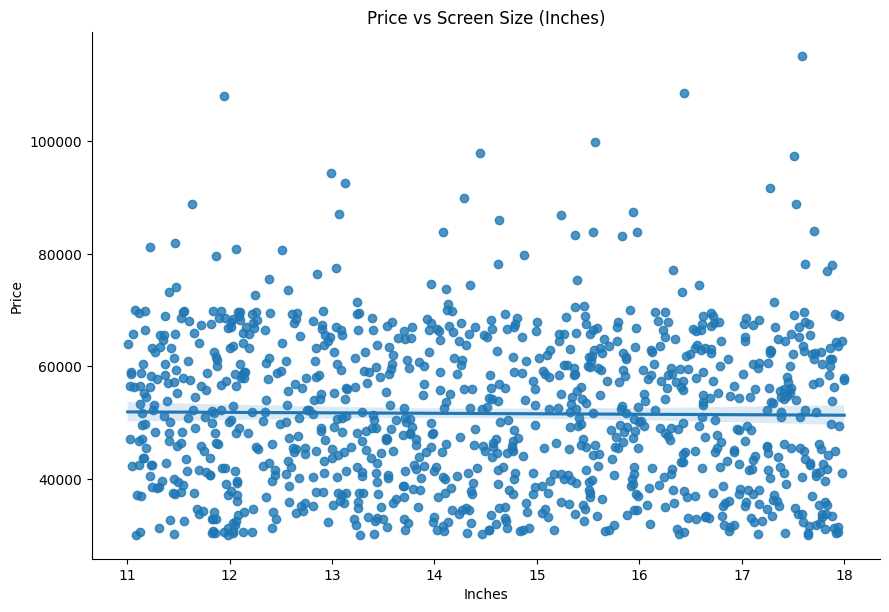

In [ ]:
snb.scatterplot(x='Inches', y='Price', data=df)
plt.xlabel("Screen Size (Inches)")
plt.ylabel("Price (INR)")
snb.lmplot(x='Inches', y='Price', data=df, height=6, aspect=1.5)
plt.title("Price vs Screen Size (Inches)")
plt.show()

In [ ]:
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '').astype(int)


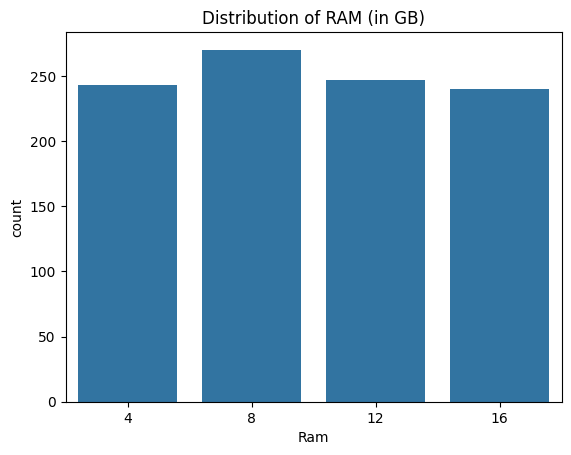

In [ ]:
snb.countplot(x='Ram', data=df)
plt.title("Distribution of RAM (in GB)")
plt.show()

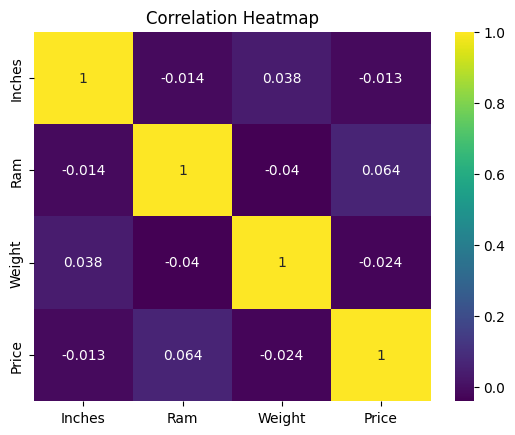

In [ ]:
snb.heatmap(df[['Inches', 'Ram', 'Weight', 'Price']].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

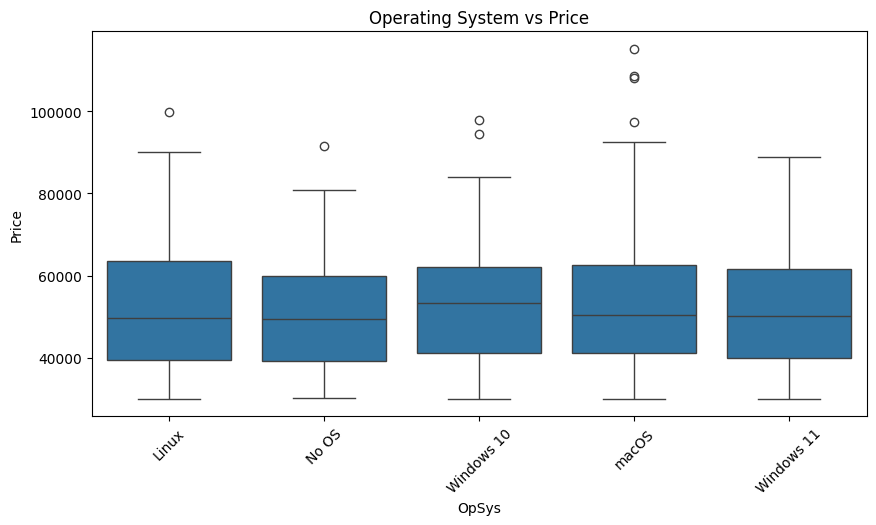

In [ ]:
plt.figure(figsize=(10,5))
snb.boxplot(x='OpSys', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Operating System vs Price")
plt.show()


In [ ]:
print(df['Memory'])     

0             512GB SSD
1        128GB PCIe SSD
2               1TB HDD
3        512GB NVMe SSD
4             512GB SSD
             ...       
995           128GB SSD
996        2TB SATA SSD
997      128GB PCIe SSD
998    1TB Fusion Drive
999             4TB HDD
Name: Memory, Length: 1000, dtype: object


In [ ]:
# Replace 'GB' and 'TB' with numbers
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')  # 1TB = 1000GB

# Replace '+' with ' + ' to avoid split issues
df['Memory'] = df['Memory'].str.replace('+', ' + ')

# Now split into two parts if exists
memory_split = df['Memory'].str.split(' + ', expand=True)

# Function to extract storage type and size
def extract_storage(mem_part):
    if pd.isnull(mem_part):
        return pd.Series([0, 0, 0, 0])  # SSD, HDD, Hybrid, Flash
    ssd = hdd = hybrid = flash = 0
    if 'SSD' in mem_part:
        ssd = int(mem_part.split()[0])
    elif 'HDD' in mem_part:
        hdd = int(mem_part.split()[0])
    elif 'Hybrid' in mem_part:
        hybrid = int(mem_part.split()[0])
    elif 'Flash Storage' in mem_part:
        flash = int(mem_part.split()[0])
    return pd.Series([ssd, hdd, hybrid, flash])

# Apply extraction
mem_1 = memory_split[0].apply(extract_storage)
mem_2 = memory_split[1].apply(extract_storage) if memory_split.shape[1] > 1 else pd.DataFrame([[0,0,0,0]]*len(df))

# Add total memory columns
df['SSD'] = mem_1[0] + mem_2[0]
df['HDD'] = mem_1[1] + mem_2[1]
df['Hybrid'] = mem_1[2] + mem_2[2]
df['Flash_Storage'] = mem_1[3] + mem_2[3]


In [ ]:
df.drop('Memory', axis=1, inplace=True)


In [ ]:
# Extract CPU Brand
df['Cpu_Brand'] = df['Cpu'].apply(lambda x: x.split()[0])

# Extract CPU Name
df['Cpu_Name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[:3]))

# Optional: Create simplified CPU type
def extract_cpu_type(text):
    text = text.lower()
    if 'i3' in text:
        return 'Intel i3'
    elif 'i5' in text:
        return 'Intel i5'
    elif 'i7' in text:
        return 'Intel i7'
    elif 'ryzen 3' in text:
        return 'Ryzen 3'
    elif 'ryzen 5' in text:
        return 'Ryzen 5'
    elif 'ryzen 7' in text:
        return 'Ryzen 7'
    elif 'celeron' in text:
        return 'Celeron'
    elif 'pentium' in text:
        return 'Pentium'
    else:
        return 'Other'



df['Cpu_Type'] = df['Cpu'].apply(extract_cpu_type)



In [ ]:
df.drop([ 'Cpu'], axis=1, inplace=True)


In [ ]:
# Extract GPU brand
df['Gpu_Brand'] = df['Gpu'].apply(lambda x: x.split()[0])

# Optionally: Keep only brand + series
df['Gpu_Name'] = df['Gpu'].apply(lambda x: ' '.join(x.split()[:3]))

# Example: Print value counts
print(df['Gpu_Brand'].value_counts())


Gpu_Brand
NVIDIA    348
AMD       339
Intel     313
Name: count, dtype: int64


In [ ]:
def simplify_gpu_brand(brand):
    if brand in ['Intel', 'AMD', 'Nvidia']:
        return brand
    else:
        return 'Others'

df['Gpu_Brand'] = df['Gpu_Brand'].apply(simplify_gpu_brand)


In [ ]:
df.drop(['Gpu', 'Gpu_Name'], axis=1, inplace=True)

In [ ]:
# Identify if it's a touchscreen
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)


df['Resolution'] = df['ScreenResolution'].apply(lambda x: re.findall(r'\d+x\d+', str(x)))
df['Resolution'] = df['Resolution'].apply(lambda x: x[0] if x else '0x0')


df[['X_res', 'Y_res']] = df['Resolution'].str.split('x', expand=True)
df['X_res'] = pd.to_numeric(df['X_res'], errors='coerce')
df['Y_res'] = pd.to_numeric(df['Y_res'], errors='coerce')



df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# Drop rows where PPI can't be calculated
df = df.dropna(subset=['Inches', 'X_res', 'Y_res'])
df['PPI'] = (((df['X_res']**2 + df['Y_res']**2)**0.5) / df['Inches']).round(2)
df.drop(['ScreenResolution', 'Resolution', 'X_res', 'Y_res'], axis=1, inplace=True)




In [ ]:
def categorize_os(os):
    if 'Windows' in os:
        return 'Windows'
    elif 'Mac' in os or 'macOS' in os:
        return 'Mac'
    elif 'Linux' in os:
        return 'Linux'
    elif 'Chrome' in os:
        return 'Chrome OS'
    elif 'No OS' in os or 'DOS' in os:
        return 'No OS'
    else:
        return 'Other'

df['OS_Category'] = df['OpSys'].apply(categorize_os)

# Optional: drop original column
df.drop('OpSys', axis=1, inplace=True)

# Check how many in each category
print(df['OS_Category'].value_counts())


OS_Category
Windows    370
No OS      224
Mac        219
Linux      187
Name: count, dtype: int64


C:\Users\Neeraj kumar\AppData\Local\Temp\ipykernel_17368\3190797422.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  snb.barplot(x='Gpu_Brand', y='Price', data=df, estimator='mean', ci=None, palette='pastel')
C:\Users\Neeraj kumar\AppData\Local\Temp\ipykernel_17368\3190797422.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snb.barplot(x='Gpu_Brand', y='Price', data=df, estimator='mean', ci=None, palette='pastel')


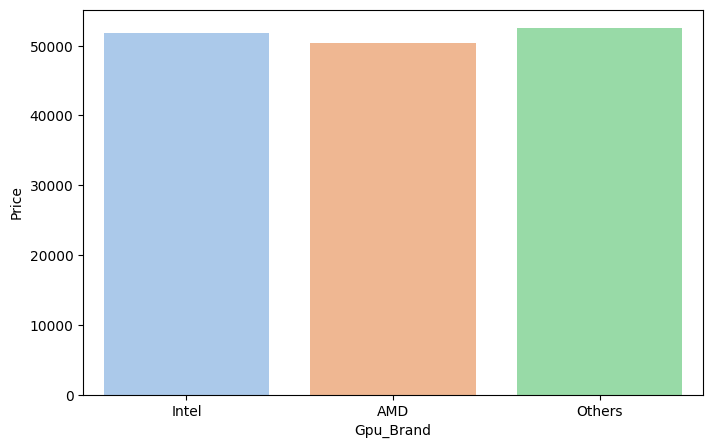

In [ ]:
plt.figure(figsize=(8,5))
snb.barplot(x='Gpu_Brand', y='Price', data=df, estimator='mean', ci=None, palette='pastel')
order = df.groupby('Gpu_Brand')['Price'].mean().sort_values(ascending=False).index




C:\Users\Neeraj kumar\AppData\Local\Temp\ipykernel_17368\3157993141.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  snb.barplot(x='Gpu_Brand', y='Price', hue='OS_Category', data=df, estimator='mean', ci=None)


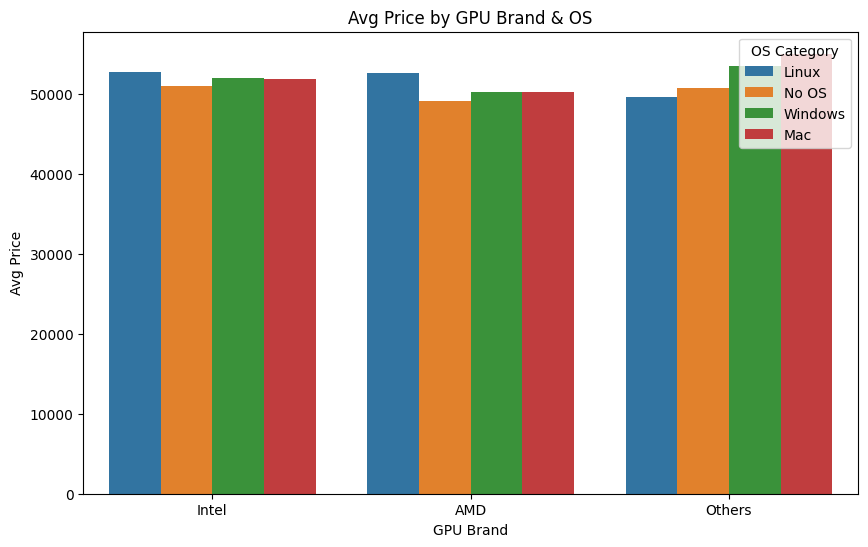

In [ ]:
if 'OS_Category' in df.columns:
    plt.figure(figsize=(10,6))
    snb.barplot(x='Gpu_Brand', y='Price', hue='OS_Category', data=df, estimator='mean', ci=None)
    plt.title('Avg Price by GPU Brand & OS')
    plt.ylabel('Avg Price')
    plt.xlabel('GPU Brand')
    plt.xticks(rotation=0)
    plt.legend(title='OS Category')
    plt.show()
else:
    print("❌ 'OS_Category' column is missing.")
plt.show()


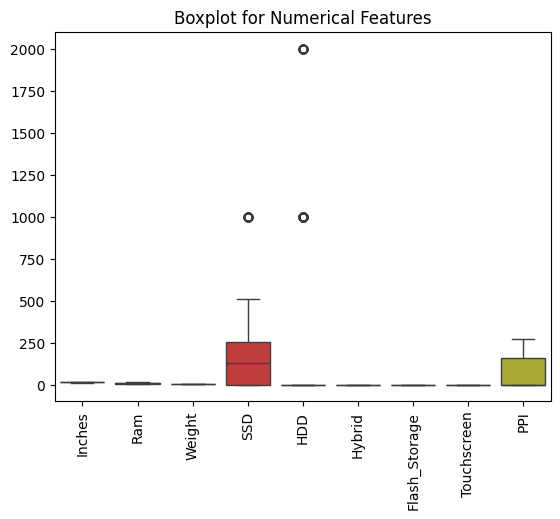

In [ ]:
numeric_cols = X.select_dtypes(include='number')
snb.boxplot(data=numeric_cols)
plt.xticks(rotation=90)
plt.title("Boxplot for Numerical Features")
plt.show()


In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]



In [ ]:
print(f"Original shape: {df.shape}")
print(f"After outlier removal: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")


Original shape: (1000, 17)
After outlier removal: (611, 17)
Rows removed: 389


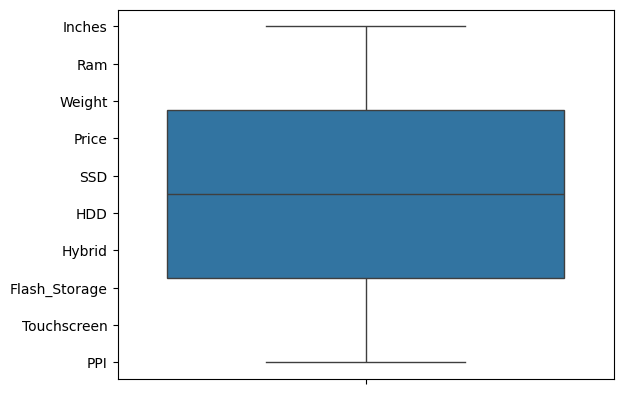

In [ ]:
snb.boxplot(data=numeric_cols)
plt.xticks(rotation=90)
plt.show()

In [ ]:



y = df_clean['Price']
X = df_clean.drop(['Price', 'CompanyName', 'Name', 'Gpu', 'Cpu', 'OpSys', 'ScreenResolution', 'Memory'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)


In [ ]:
print(X.columns)


Index(['Inches', 'Ram', 'Weight', 'SSD', 'HDD', 'Hybrid', 'Flash_Storage',
       'Touchscreen', 'PPI', 'TypeOfLaptop_Business Laptop',
       'TypeOfLaptop_Gaming', 'TypeOfLaptop_NoteBook',
       'TypeOfLaptop_UltraBook', 'TypeOfLaptop_WorkStation', 'Cpu_Brand_Intel',
       'Cpu_Name_AMD Ryzen 5', 'Cpu_Name_AMD Ryzen 7',
       'Cpu_Name_Intel Atom x5-Z8550', 'Cpu_Name_Intel Celeron Dual',
       'Cpu_Name_Intel Core i5', 'Cpu_Name_Intel Core i7',
       'Cpu_Name_Intel Core i9', 'Cpu_Name_Intel Pentium Quad',
       'Cpu_Name_Intel Xeon E3-1505M', 'Cpu_Type_Intel i5',
       'Cpu_Type_Intel i7', 'Cpu_Type_Other', 'Cpu_Type_Pentium',
       'Cpu_Type_Ryzen 5', 'Cpu_Type_Ryzen 7', 'Gpu_Brand_Intel',
       'Gpu_Brand_Others', 'OS_Category_Mac', 'OS_Category_No OS',
       'OS_Category_Windows'],
      dtype='object')


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 11405.467952903902
RMSE: 13204.947236960348
R² Score: -0.0051919543166492055


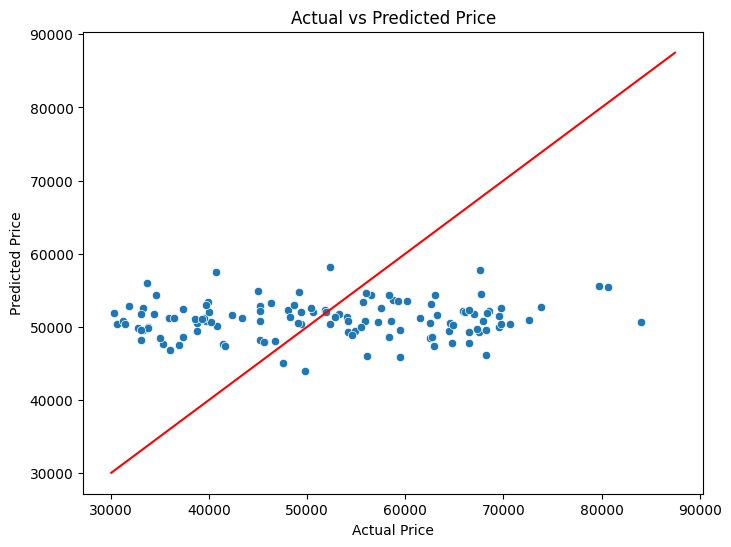

In [ ]:
plt.figure(figsize=(8,6))
snb.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red') 

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R² Score: {r2:.4f}")

MAE : ₹11220.30
RMSE: ₹13287.62
R² Score: -0.0178


In [ ]:

df['Price'].dtype

dtype('float64')

In [ ]:
df['Price'].describe()

count      1000.000000
mean      51602.255339
std       13802.833231
min       30060.275100
25%       40376.617670
50%       50683.971717
75%       61897.280126
max      115137.368077
Name: Price, dtype: float64